In [80]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn import metrics, svm

# Neural Network libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import callbacks
from mlxtend.plotting import plot_confusion_matrix

In [52]:
# loading and reading the file (heart failure clinical records)
heart_failure = pd.read_csv('heart_failure_clinical_records_dataset.csv')
heart_failure.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [53]:
# information about our dataset
heart_failure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [106]:
# generating descriptive statistics
heart_failure.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


## Exploratory Data Analysis ##


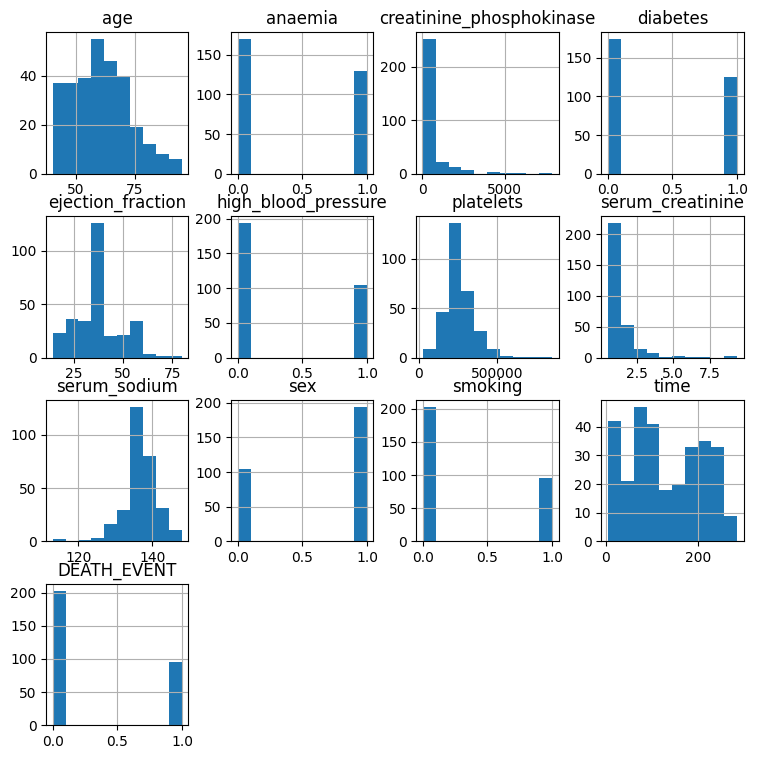

In [55]:
# plotting an histogram to see how the data are distributed in the dataset
heart_failure.hist(bins= 10, figsize= (9,9))
plt.show()

In [56]:
pd.DataFrame(heart_failure['DEATH_EVENT'].value_counts())

,DEATH_EVENT
0,203
1,96


[Text(0, 0, '203'), Text(0, 0, '96')]

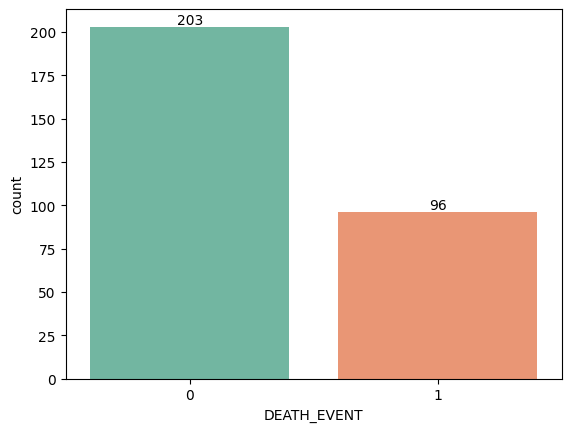

In [57]:
# creating a bar plot of the target labels
ax = sns.countplot(x= heart_failure["DEATH_EVENT"], palette='Set2')
ax.bar_label(ax.containers[0])

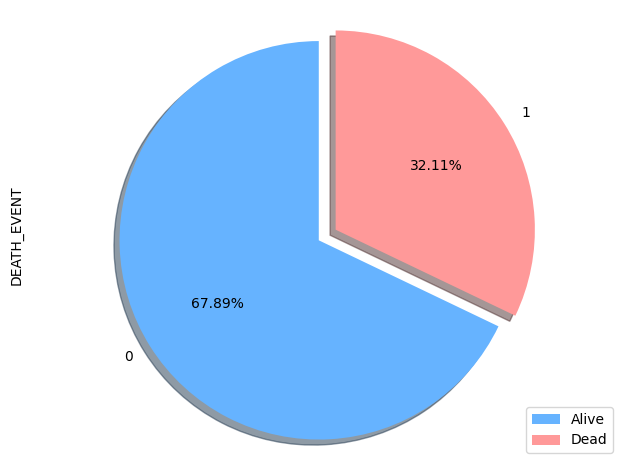

In [58]:
# plotting a pie chart with DEATH_EVENT count
explode = (0, 0.1)
fig, ax = plt.subplots()
heart_failure.groupby(['DEATH_EVENT'])['DEATH_EVENT'].count().plot(kind = 'pie', colors = ['#66b3ff','#ff9999'], y=heart_failure['DEATH_EVENT'], autopct = '%.2f%%', explode=explode, ax = ax, startangle=90,shadow=True)
plt.legend(['Alive','Dead'])
ax.axis('equal')  
plt.tight_layout()
plt.show()

The values in the target label column demonstrate that it is an imbalanced dataset, as target class has an uneven distribution of observations, i.e. one type of target class values are 203 versus the other with 96.

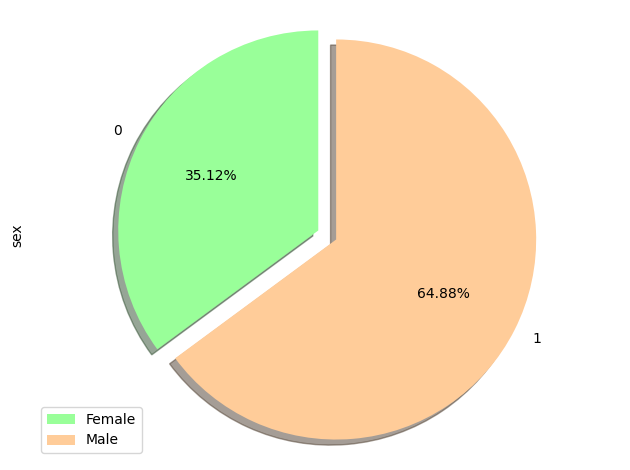

In [59]:
# plotting a pie chart with sex count
explode = (0, 0.1)
fig, ax = plt.subplots()
heart_failure.groupby(['sex'])['sex'].count().plot(kind = 'pie', colors = ['#99ff99','#ffcc99'], y=heart_failure['sex'], autopct = '%.2f%%', explode=explode, ax = ax, startangle=90,shadow=True)
plt.legend(['Female','Male'])
ax.axis('equal')  
plt.tight_layout()
plt.show()

In [110]:
heart_failure.groupby(['sex','DEATH_EVENT'])['sex'].count()

sex  DEATH_EVENT
0    0               71
     1               34
1    0              132
     1               62
Name: sex, dtype: int64

Text(0.5, 1.0, 'Death_event per sex')

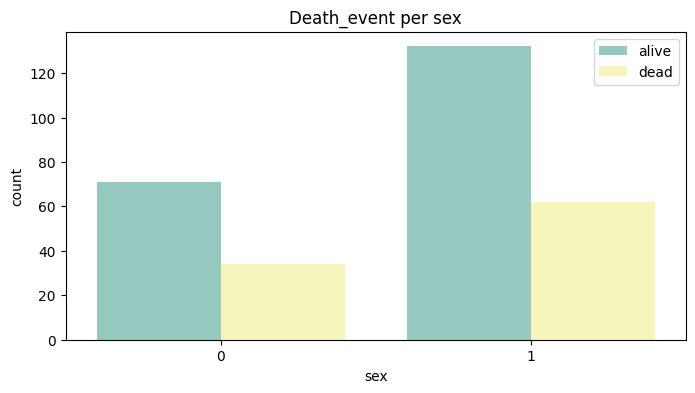

In [109]:
# creating a sex/death_event barplot
ax = plt.figure(figsize=(8,4))
ax = sns.countplot(data=heart_failure, x=heart_failure["sex"],hue="DEATH_EVENT", palette = 'Set3')
plt.legend(['alive', 'dead'])
plt.title('Death_event per sex')

In [60]:
# correlation Matrix
corr_mat = heart_failure.corr(numeric_only=True)
corr_mat

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


<AxesSubplot: >

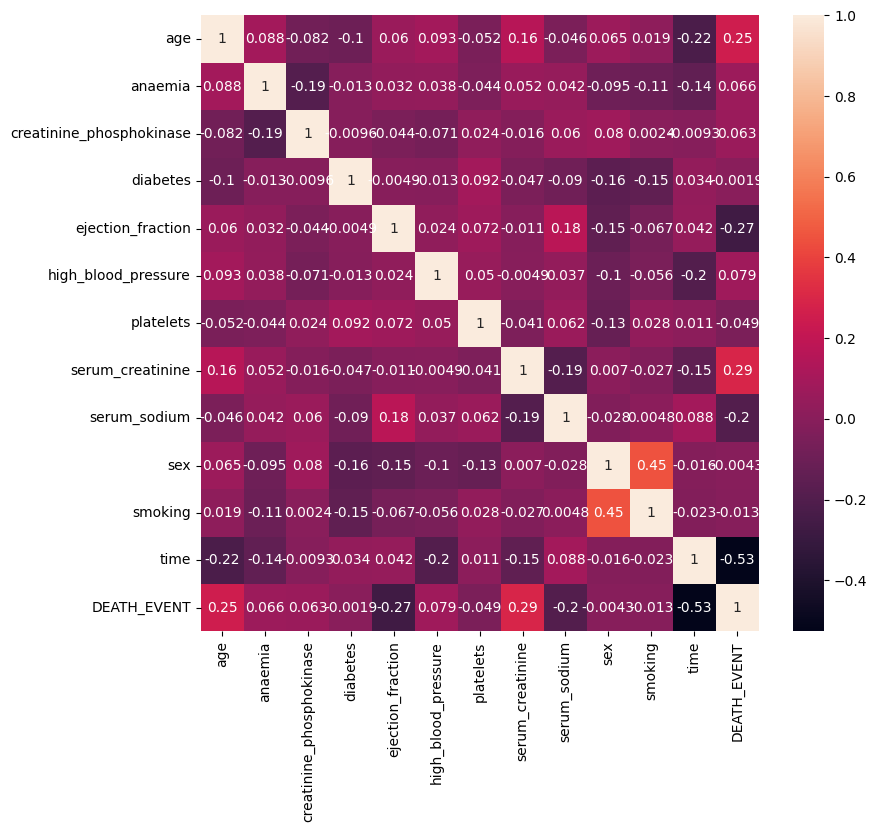

In [61]:
# heatmap
fig, ax = plt.subplots(figsize=(9,8))
sns.heatmap(corr_mat, annot=True)

Observations: 

- there is a positive correlation between "smoking" and "sex", although none of them show a high correlation with the target value.

- the features "serum_creatinine" and "age" are the most positively correlated with the target value.

- however, the feature "time" has the highest influence on the target value (inverse relationship), since an early diagnose of cardiovascular issues would have been crucial so as to get timely treatment and therefore reducing the chances of any fatality.



In [62]:
# creating a boxplot to check outliers present in the dataset
# heart_failure.boxplot(figsize=(18,18))
# plt.show()

In [63]:
heart_failure.groupby(['sex','smoking'])['sex'].count()

sex  smoking
0    0          101
     1            4
1    0          102
     1           92
Name: sex, dtype: int64

Text(0.5, 1.0, 'Smoking habits per sex')

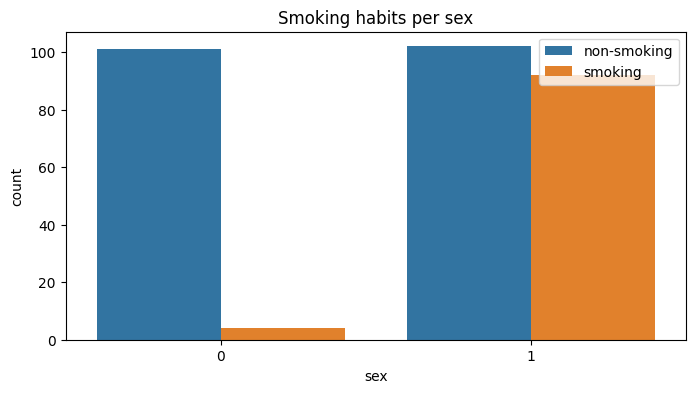

In [64]:
# creating a smoking/sex barplot
ax = plt.figure(figsize=(8,4))
ax = sns.countplot(data=heart_failure, x=heart_failure["sex"],hue="smoking")
plt.legend(['non-smoking', 'smoking'])
plt.title('Smoking habits per sex')

There is a significant difference in the dataset between women who do not smoke and those who smoke, the former being significantly higher, while the figures for men are virtually the same.

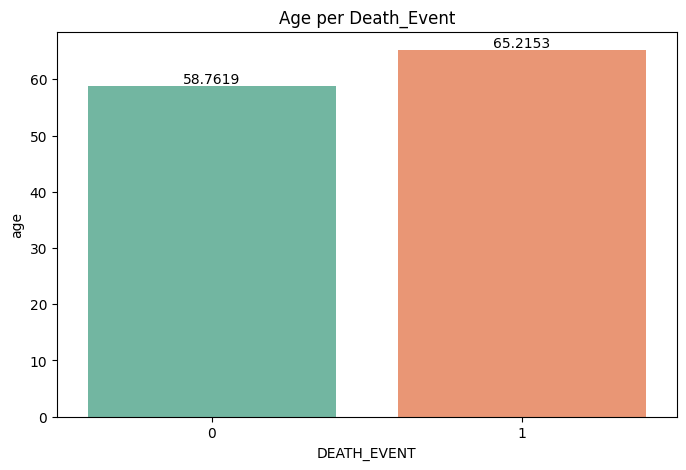

In [65]:
# creating an age/DEATH_EVENT barplot
ax = plt.figure(figsize=(8,5))
ax = sns.barplot(x="DEATH_EVENT", y="age",data=heart_failure.groupby('DEATH_EVENT')['age'].mean('age').to_frame().reset_index(), palette='Set2')
ax.bar_label(ax.containers[0])
plt.title('Age per Death_Event')
plt.show()

Text(0.5, 1.0, 'Age density distribution for the alive/dead population')

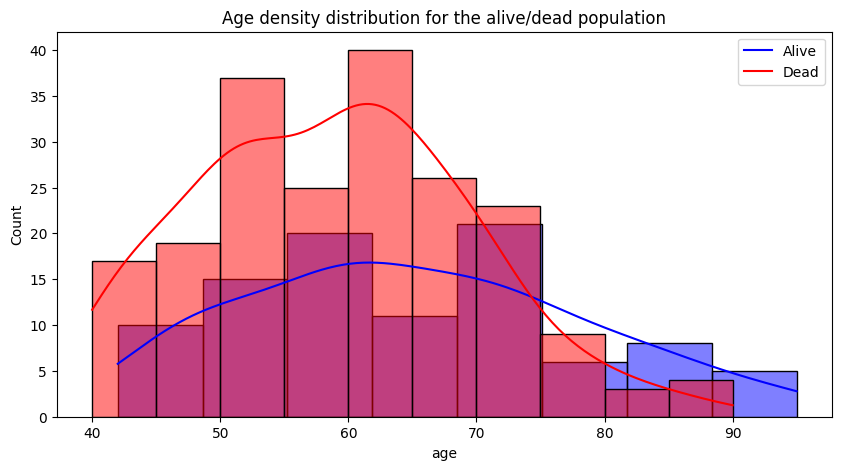

In [66]:
# representing the age density distribution for the population (alive/dead)
plt.figure(figsize=(10,5))
ax = sns.histplot(heart_failure["age"][heart_failure.DEATH_EVENT == 1], color="blue", kde=True)
sns.histplot(heart_failure["age"][heart_failure.DEATH_EVENT == 0], color="red", kde=True)
plt.legend(['Alive', 'Dead'])
plt.title('Age density distribution for the alive/dead population')

<AxesSubplot: xlabel='time', ylabel='age'>

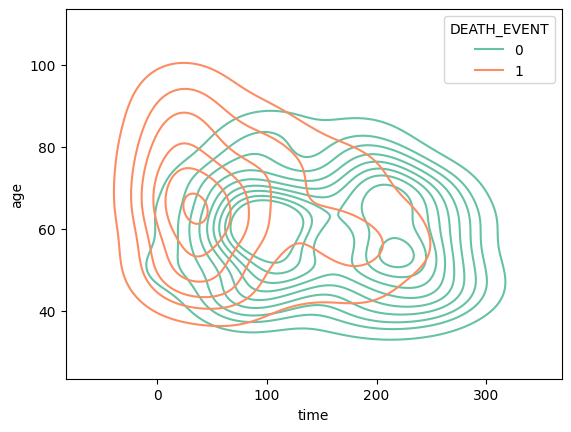

In [67]:
# plotting "Kernel Density Estimation (kde plot)" of time and age features - both being significant features 
sns.kdeplot(x=heart_failure["time"], y=heart_failure["age"], hue =heart_failure["DEATH_EVENT"], palette='Set2')

## Data preprocessing ##


In [73]:
# defining independent and dependent variables
X = heart_failure.iloc[:, :-1].values # picking all columns excluding the last one 
y = heart_failure.iloc[:, -1].values

In [74]:
# standard scaler 
s_scaler = preprocessing.StandardScaler()
X_scaled = s_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled) 

In [75]:
# splitting the data into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=32)

In [76]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11
155,-0.070223,1.147968,-0.362189,1.179830,-1.107370,-0.735688,-0.710340,0.296405,0.766064,0.735688,-0.687682,-0.132425
293,0.182411,1.147968,-0.494330,1.179830,-0.260991,-0.735688,-0.863965,-0.478205,-0.141976,0.735688,1.454161,1.803451
183,1.192945,-0.871105,-0.498459,-0.847579,-0.007077,1.359272,-0.403091,1.071014,-0.595996,0.735688,-0.687682,0.409620
217,-0.575491,1.147968,-0.159848,-0.847579,2.701337,1.359272,-1.150731,7.364715,0.085034,-1.359272,-0.687682,0.848419
15,1.782424,1.147968,-0.209401,-0.847579,1.008578,-0.735688,-2.215863,-0.090900,-0.141976,0.735688,-0.687682,-1.513350
...,...,...,...,...,...,...,...,...,...,...,...,...
71,-0.238646,-0.871105,0.000166,1.179830,-0.260991,-0.735688,-1.447739,-0.478205,0.539054,0.735688,1.454161,-0.764811
252,-0.912335,-0.871105,-0.347736,-0.847579,0.585389,1.359272,0.108991,-0.381379,-0.823006,0.735688,-0.687682,1.093630
88,-1.417603,-0.871105,-0.513944,1.179830,0.162199,1.359272,-0.290433,-0.671857,0.539054,0.735688,-0.687682,-0.661565
43,0.940312,-0.871105,-0.469553,1.179830,1.008578,1.359272,-0.464541,-0.381379,-0.595996,0.735688,-0.687682,-1.255233


In [78]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11
109,-1.333392,-0.871105,-0.299216,1.179830,-0.260991,-0.735688,6.008180,-0.090900,1.220084,0.735688,1.454161,-0.545412
264,0.013988,-0.871105,0.000166,1.179830,-0.007077,-0.735688,-1.191698,-0.187726,0.993074,0.735688,-0.687682,1.377558
285,-0.491279,1.147968,-0.425162,1.179830,0.162199,-0.735688,0.743973,-0.187726,-0.368986,0.735688,-0.687682,1.545334
19,-1.080758,1.147968,0.000166,1.179830,1.431768,-0.735688,-1.806197,0.490057,-3.547126,-1.359272,-0.687682,-1.487538
123,-0.070223,1.147968,0.000166,-0.847579,-0.684180,1.359272,-1.396531,-0.478205,1.901114,-1.359272,-0.687682,-0.455071


## Artifical Neural Network (ANN) Model ##


In [127]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=30, # how many epochs to wait before stopping
    restore_best_weights=True)

In [128]:
# initialising the NN
model = Sequential()

# setting up the layers
# input layer
model.add(Dense(units=15, kernel_initializer='uniform', activation='relu', input_dim=12)) 
# hidden layer
model.add(Dense(units=5, kernel_initializer='uniform', activation='relu')) 
# dropout - to avoid overfitting (regularizator)
model.add(Dropout(0.2))
# output layer
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid')) 

# compiling the ANN
model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy']) 

In [129]:
# training the ANN
history = model.fit(X_train, Y_train, batch_size = 30, epochs = 200,callbacks=[early_stopping], validation_split=0.3)

Epoch 1/200
6/6 [==============================] - 11s 181ms/step - loss: 0.6927 - accuracy: 0.6347 - val_loss: 0.6917 - val_accuracy: 0.7361
Epoch 2/200
6/6 [==============================] - 0s 38ms/step - loss: 0.6918 - accuracy: 0.6527 - val_loss: 0.6903 - val_accuracy: 0.7361
Epoch 3/200
6/6 [==============================] - 0s 58ms/step - loss: 0.6909 - accuracy: 0.6527 - val_loss: 0.6889 - val_accuracy: 0.7361
Epoch 4/200
6/6 [==============================] - 0s 40ms/step - loss: 0.6900 - accuracy: 0.6527 - val_loss: 0.6874 - val_accuracy: 0.7361
Epoch 5/200
6/6 [==============================] - 0s 35ms/step - loss: 0.6889 - accuracy: 0.6527 - val_loss: 0.6857 - val_accuracy: 0.7361
Epoch 6/200
6/6 [==============================] - 0s 31ms/step - loss: 0.6878 - accuracy: 0.6527 - val_loss: 0.6840 - val_accuracy: 0.7361
Epoch 7/200
6/6 [==============================] - 0s 32ms/step - loss: 0.6867 - accuracy: 0.6527 - val_loss: 0.6820 - val_accuracy: 0.7361
Epoch 8/200
6/6 [=

In [130]:
# making the prediction
y_pred_ann = model.predict(X_test)
y_pred_ann

2/2 [==============================] - 0s 7ms/step


array([[9.98794883e-02],
       [2.29623728e-02],
       [1.84162613e-02],
       [7.01278925e-01],
       [3.22504699e-01],
       [4.70615886e-02],
       [3.74085933e-01],
       [7.04219972e-04],
       [8.93972740e-02],
       [1.99428856e-01],
       [8.10671374e-02],
       [5.91014743e-01],
       [6.03228390e-01],
       [8.33297372e-01],
       [1.65185124e-01],
       [1.66220710e-01],
       [2.45049417e-01],
       [1.18527427e-01],
       [2.44126707e-01],
       [1.61006823e-01],
       [6.92009687e-01],
       [6.23230815e-01],
       [1.85997382e-01],
       [7.17456266e-02],
       [4.42199290e-01],
       [8.28625485e-02],
       [2.68933475e-02],
       [6.19922817e-01],
       [2.46392861e-01],
       [2.34635264e-01],
       [7.74867475e-01],
       [4.68101241e-02],
       [8.36678803e-01],
       [1.89388037e-01],
       [7.05250084e-01],
       [4.72951457e-02],
       [2.37453114e-02],
       [5.36989272e-02],
       [3.10251843e-02],
       [8.26221466e-01],


In [131]:
y_pred_ann = np.where(y_pred_ann > 0.5, 1, 0)
y_pred_ann

array([[0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1]])

In [132]:
Y_test

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [133]:
print(Y_test.shape)
print(y_pred_ann.shape)

(60,)
(60, 1)


In [134]:
# flattening to convert the y_pred to the same shape of the y_test
y_pred_ann = y_pred_ann.flatten()

In [135]:
print(Y_test.shape)
print(y_pred_ann.shape)

(60,)
(60,)


In [136]:
pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred_ann}).head(10)

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [137]:
# classification report
print(classification_report(Y_test, y_pred_ann))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        41
           1       0.74      0.74      0.74        19

    accuracy                           0.83        60
   macro avg       0.81      0.81      0.81        60
weighted avg       0.83      0.83      0.83        60



In [138]:
cm = confusion_matrix(Y_test, y_pred_ann)
print(cm)

[[36  5]
 [ 5 14]]


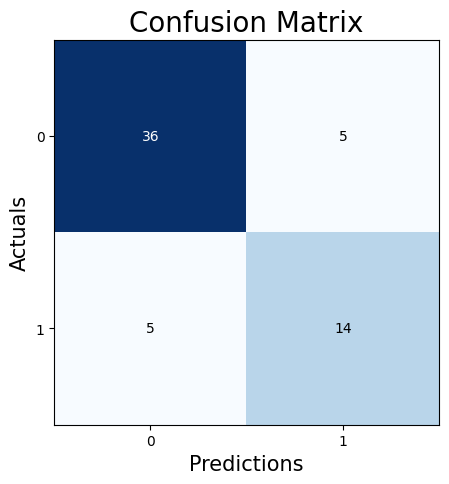

In [139]:
# plotting a confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(5,5), cmap = plt.cm.Blues)
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('Actuals', fontsize=15)
plt.title('Confusion Matrix', fontsize=20)
plt.show()

In [140]:
# area under curve (AUC)
auc = roc_auc_score(Y_test, y_pred_ann)
print('AUC: %f' %auc)

AUC: 0.807445


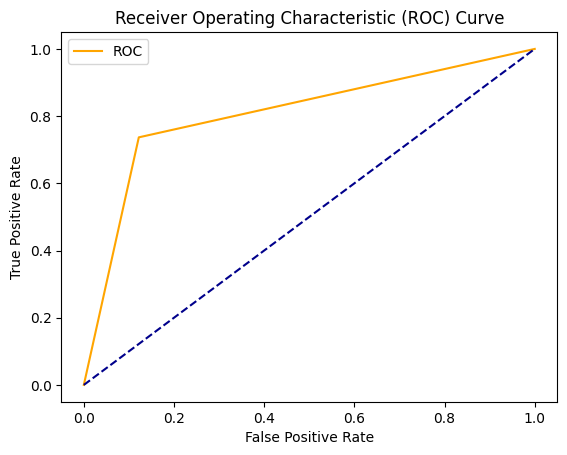

In [141]:
# receiver operating characteristic (ROC) curve
fpr, tpr = roc_curve(Y_test, y_pred_ann)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [142]:
# saving the ANN model
model.save('heartfailure_ann')

INFO:tensorflow:Assets written to: heartfailure_ann\assets


INFO:tensorflow:Assets written to: heartfailure_ann\assets
